
## Intalall Libraries



In [1]:
!pip install --upgrade tensorflow-gpu==2.0

Requirement already up-to-date: tensorflow-gpu==2.0 in /usr/local/lib/python3.7/dist-packages (2.0.0)


In [2]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing

Requirement already up-to-date: nbformat in /usr/local/lib/python3.7/dist-packages (5.1.3)


# >>>>>>>>>>>>>> Fake News Detection <<<<<<<<<<<<<<<

# Step1 : Understand the problem statment and business case

TExt ....

## Import Libraries

In [3]:

import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Step2 :load the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#%cd sample_data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_true = pd.read_csv('/content/drive/MyDrive/fake_news_detection/True.csv')
df_fake = pd.read_csv('/content/drive/MyDrive/fake_news_detection/Fake.csv')

# Step3 : Perform exploratory data analysis

In [6]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1
df_fake['isfake'] = 0

In [7]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df.sample(9)

,title,text,subject,date,isfake
44814,Hillary Flip-Flop Highlight Reel,21st Century Wire says As political smoke scre...,Middle-east,"March 25, 2016",0
7944,U.S. Sept. 11 law weakens international relati...,DUBAI (Reuters) - Saudi Arabia said on Monday ...,politicsNews,"October 3, 2016",1
28872,WATCH: Democrat Takes Michigan Gov. Rick Snyd...,"In one glorious opening statement, Rep. Elijah...",News,"March 17, 2016",0
41987,CAN SOMEONE PLEASE EXPLAIN How This Fairly Acc...,Perhaps a little trigger warning therapy is ...,left-news,"May 15, 2016",0
14770,Philippines' Duterte lauds China's help at 'cr...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"November 15, 2017",1
32196,DEADBEATS BEWARE: Trump’s Food Stamp Reform Is...,All we re hearing from the left is fear monger...,politics,"May 26, 2017",0
25605,Trump Just Got One Of His Victims’ RELATIVES ...,Donald Trump s damage control regarding his pe...,News,"October 15, 2016",0
43212,CHANGING HIS TUNE: THE MAN WHO WAS IN THE POLI...,So now that this guy fears for his life he s b...,left-news,"Apr 30, 2015",0
27988,Obama Continues To PUMMEL Trump With Some Pre...,While Republican presidential frontrunner Dona...,News,"May 3, 2016",0


In [8]:
# delete date column
df.drop(columns = ['date'], inplace = True)

In [9]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.sample(5)

,title,text,subject,isfake,original
8435,Trump hires 'street fighter' in new shakeup of...,(Reuters) - U.S. Republican Donald Trump overh...,politicsNews,1,Trump hires 'street fighter' in new shakeup of...
16744,German 'Reich' extremist given life for killin...,"NUREMBERG, Germany (Reuters) - A right-wing ex...",worldnews,1,German 'Reich' extremist given life for killin...
36108,“SNEAKY” School Caught Red Handed Recruiting K...,Recruiting kids is what Obama s campaign did s...,politics,0,“SNEAKY” School Caught Red Handed Recruiting K...
36300,WATCH Black Chicago Residents Blame Obama For ...,Barack wants the Black Community to blame Whit...,politics,0,WATCH Black Chicago Residents Blame Obama For ...
7721,A waste of money? Trump's border wall falling ...,NEW YORK (Reuters) - Donald Trump rode to the ...,politicsNews,1,A waste of money? Trump's border wall falling ...


In [10]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non


# Step4: perform data cleaning

In [11]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [13]:
# stop words list
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [15]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [16]:
# Show original news
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [17]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   isfake    44898 non-null  int64 
 4   original  44898 non-null  object
 5   clean     44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [19]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [20]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [21]:
len(list_of_words)

9277072

In [22]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

108705

In [23]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [24]:
df.sample(8)

,title,text,subject,isfake,original,clean,clean_joined
21840,Trump Humiliated As DACA Decision Practically...,As we saw with his Muslim travel ban as well a...,News,0,Trump Humiliated As DACA Decision Practically...,"[trump, humiliated, daca, decision, practicall...",trump humiliated daca decision practically kil...
15957,Springer Nature blocks access to certain artic...,"BEIJING (Reuters) - Springer Nature, which pub...",worldnews,1,Springer Nature blocks access to certain artic...,"[springer, nature, blocks, access, certain, ar...",springer nature blocks access certain articles...
40467,MULTI-MILLIONAIRE Global-Warming Hypocrites LE...,Enjoy:,left-news,0,MULTI-MILLIONAIRE Global-Warming Hypocrites LE...,"[multi, millionaire, global, warming, hypocrit...",multi millionaire global warming hypocrites le...
37179,THIS IS RICH! COMMIE NYC MAYOR UNLEASHES CLASS...,New York Mayor Bill de Blasio traveled to Milw...,politics,0,THIS IS RICH! COMMIE NYC MAYOR UNLEASHES CLASS...,"[rich, commie, mayor, unleashes, class, scott,...",rich commie mayor unleashes class scott walker...
32012,OOPS! MN: JUROR In Case Against Cop Who Killed...,The only two black jurors in the Philando Cast...,politics,0,OOPS! MN: JUROR In Case Against Cop Who Killed...,"[oops, juror, case, killed, philando, castile,...",oops juror case killed philando castile reveal...
13726,Pakistani police exhume couple's bodies suspec...,"KARACHI, Pakistan (Reuters) - Pakistani police...",worldnews,1,Pakistani police exhume couple's bodies suspec...,"[pakistani, police, exhume, couple, bodies, su...",pakistani police exhume couple bodies suspecti...
9277,Clinton hits rivals on immigration in Californ...,LOS ANGELES (Reuters) - Hillary Clinton fought...,politicsNews,1,Clinton hits rivals on immigration in Californ...,"[clinton, hits, rivals, immigration, californi...",clinton hits rivals immigration california cam...
30785,JUDICIARY MEMBER: Why was FBI’s Case on Clinto...,I am immediately calling for an investigation...,politics,0,JUDICIARY MEMBER: Why was FBI’s Case on Clinto...,"[judiciary, member, case, clinton, labelled, s...",judiciary member case clinton labelled special...


In [25]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

# Step5 : Vsualize cleaned up dataset

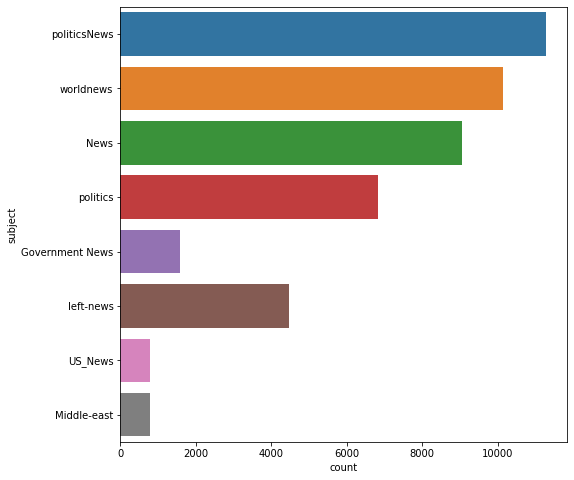

In [26]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

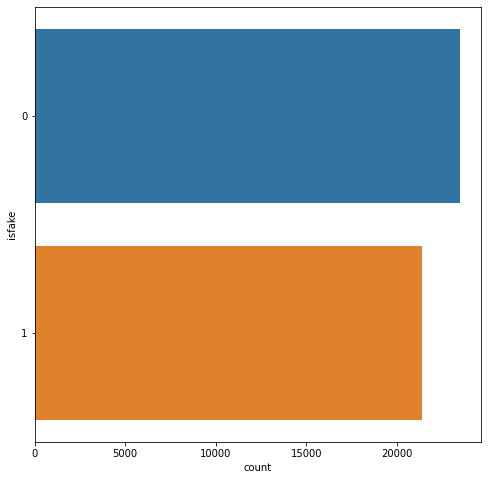

In [27]:
# Plot the count plot for fake vs. true news
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

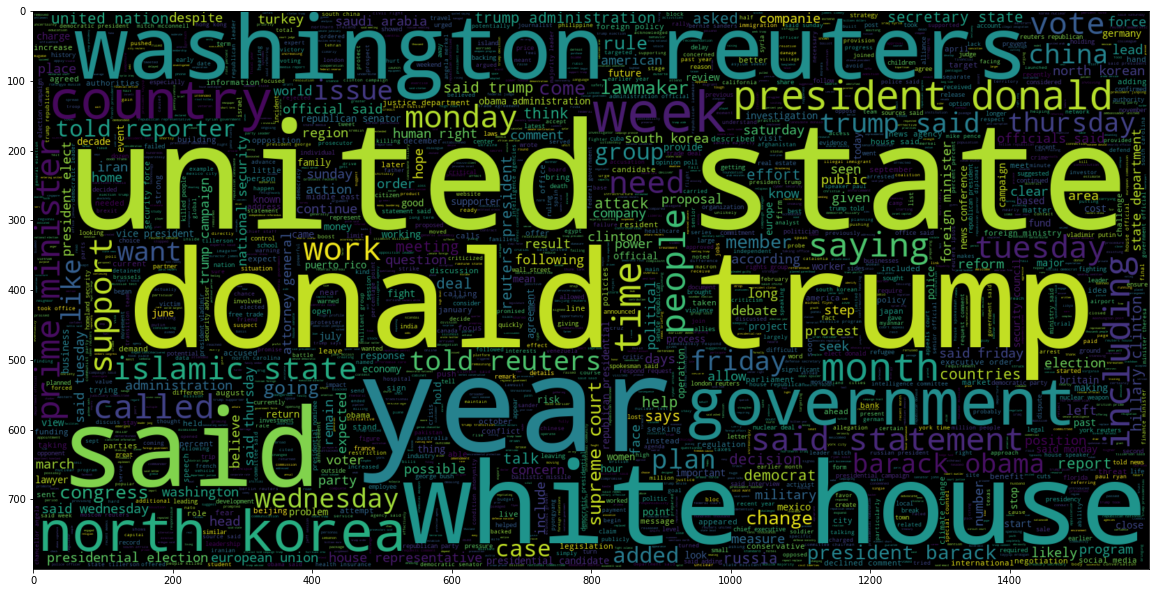

In [28]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

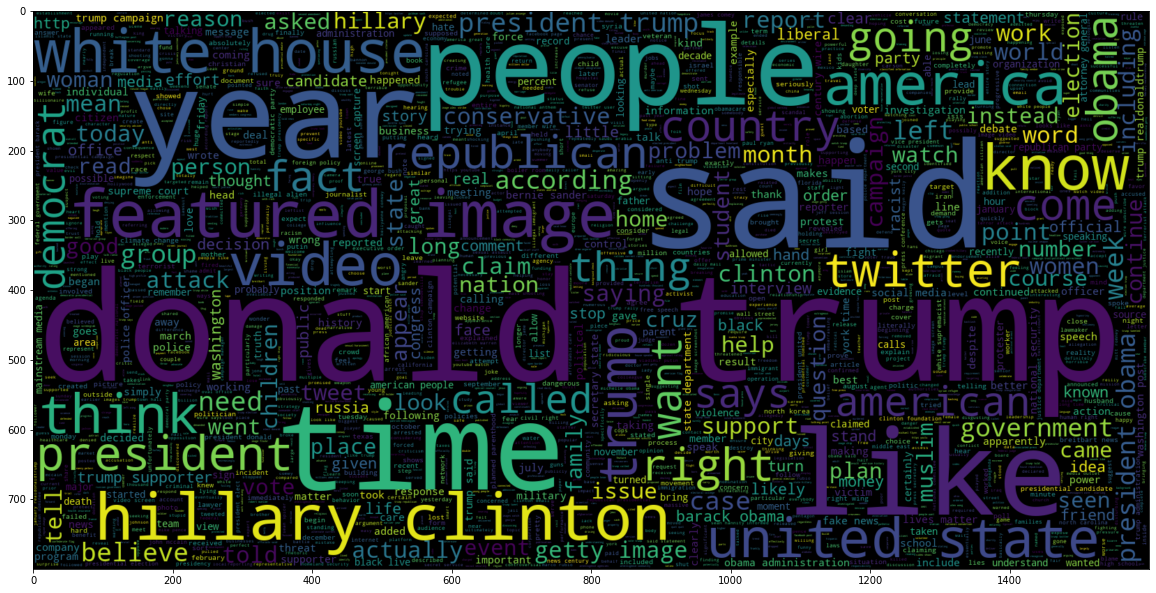

In [29]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [30]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4406


In [31]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

# Step6 : prepare the data by performing tokenization and padding

In [32]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [33]:
from nltk import word_tokenize

In [34]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [35]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [36]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [37]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [20108   844    71   955  9241  5579     1   588     9   504   240    77
  2283  6365   844    71 30708   472   288  9241  5579     3    10     1
    22    21   134    81  1376   266    61     2   844   875   554  1002
   367     0     0     0]
The padded encoding for document 2  is :  [   98  1654     6  2133     8   679  1712   435  2883  1345  4842    98
  3571  1241  1654     6   589   499    54   583  7675 49732    14 24252
  3701  1176  4439  1712   435     8  1345  4842   875  2247  1176   262
   884    15     8   717]


# Step7: Build and train the model 

---



In [38]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         13914240  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,210,433
Trainable params: 14,210,433
Non-trainable params: 0
_________________________________________________________________


In [39]:
total_words

108705

In [40]:
y_train = np.asarray(y_train)

In [41]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Train on 32326 samples, validate on 3592 samples
Epoch 1/2
32326/32326 [==============================] - 89s 3ms/sample - loss: 0.0427 - acc: 0.9825 - val_loss: 0.0021 - val_acc: 0.9994
Epoch 2/2
32326/32326 [==============================] - 82s 3ms/sample - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0133 - val_acc: 0.9969


# Step8 : assess trained model performance


In [42]:
# make prediction
pred = model.predict(padded_test)

# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [43]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9919821826280624


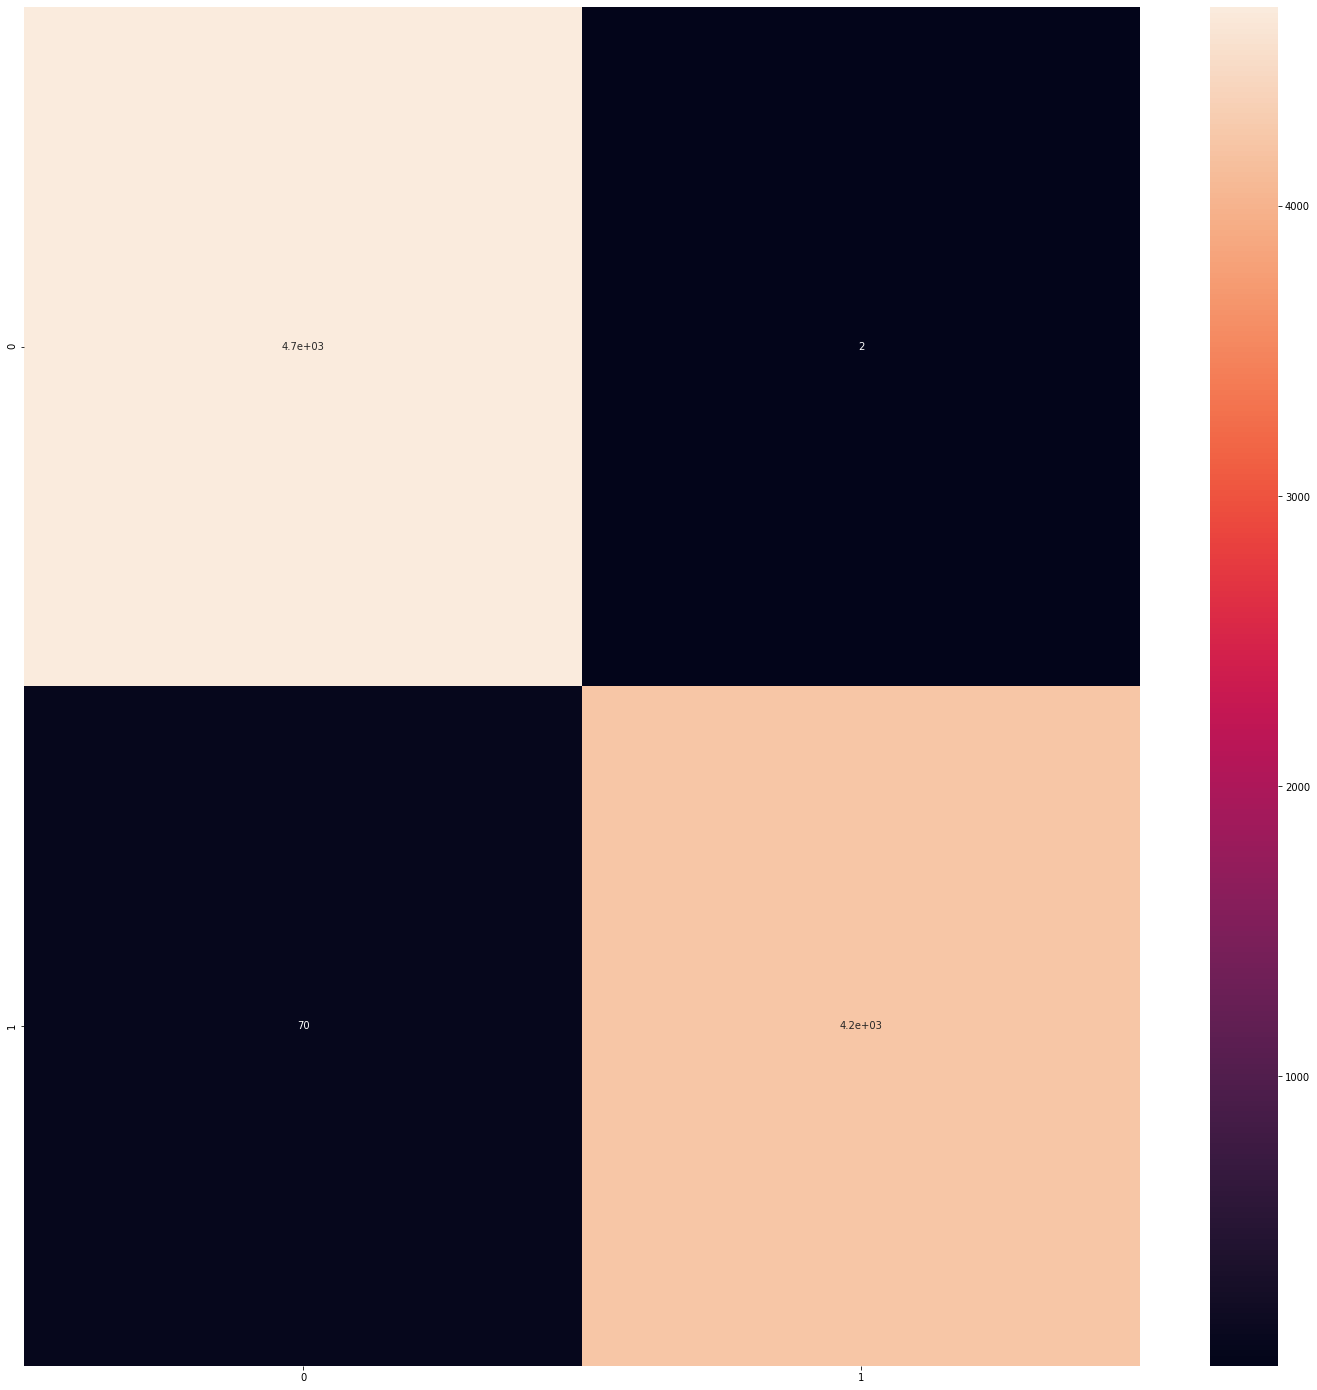

In [44]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [45]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}


## >>>>>>>> Learning Materials <<<<<<<<<<

+ 
UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM 

> https://colah.github.io/posts/2015-08-Understanding-LSTMs/

> http://karpathy.github.io/2015/05/21/rnn-effectiveness/

> https://www.coursera.org/projects/nlp-fake-news-detector